In [5]:
%matplotlib inline

import pandas as pd
import math
from matplotlib.ticker import FuncFormatter
from datetime import datetime 

pd.options.mode.chained_assignment = None

# Helper functions
def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)

money_formatter = FuncFormatter(money)


In [18]:

def backtest(df):
    'Backtest a dataset using the SMA strategy'
    initial_value = 100
    
    
    df['invested'] = df['Adj Close'] >= df['sma']  
    df['sreturn'] = df['invested'].shift(1) * df['return']
    df['Buy & Hold'] = initial_value * (1 + df['return']).cumprod()
    df['Trend'] = initial_value * (1 + df['sreturn']).cumprod()
    df = df.dropna()
    
    start = df.index.min()
    end = df.index.max()
    
    # Plot graph
    ax = df[['Trend', 'Buy & Hold']].plot(grid=True, kind='line', title="S&P 500\nTrend (12 month SMA) vs. Buy & Hold\n{} -  {}".format(start.year, end.year), logy=True, figsize=(12, 6))
    ax.yaxis.set_major_formatter(money_formatter)

    # Add end values to graph
    portfolio_value = df.iloc[-1]['Trend']
    benchmark_value = df.iloc[-1]['Buy & Hold']
    years = float(end.year-start.year)-1.00+(12-start.month)/12.00+(end.month/12)
    portfolio_return = (((portfolio_value / 100.00) ** (1.00/years)) - 1) * 100.00
    benchmark_return = (((benchmark_value / 100.00) ** (1.00/years)) - 1) * 100.00
    
    text = 'Portfolio value: ${:,.0f} ({:,.2f}%)'.format(portfolio_value, portfolio_return)
    text += "\n" + 'Benchmark value: ${:,.0f} ({:,.2f}%)'.format(benchmark_value, benchmark_return)
    ax.text(0.98, 0.04, text,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=15)

    return

In [19]:
# calculate 12-month SMA & get rid of head (without sma)
df=pd.read_csv('data/SP500.csv', sep=',', parse_dates=True, index_col='Date', usecols=['Adj Close', 'Date'])
df['return'] = df['Adj Close'].pct_change()
df['sma'] = df['Adj Close'].rolling(window=365).mean()
df = df.dropna() 
df.head()

,Adj Close,return,sma
Date,,,
1961-06-14,65.980003,0.002736,58.350521
1961-06-15,65.690002,-0.004395,58.366356
1961-06-16,65.180000,-0.007764,58.379479
1961-06-19,64.580002,-0.009205,58.391671
1961-06-20,65.150002,0.008826,58.406630


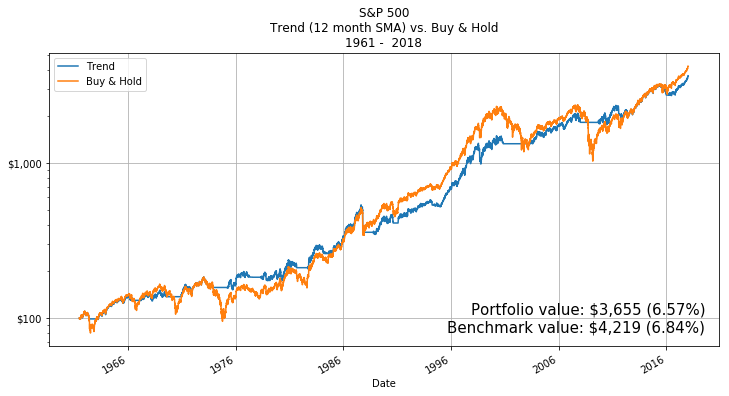

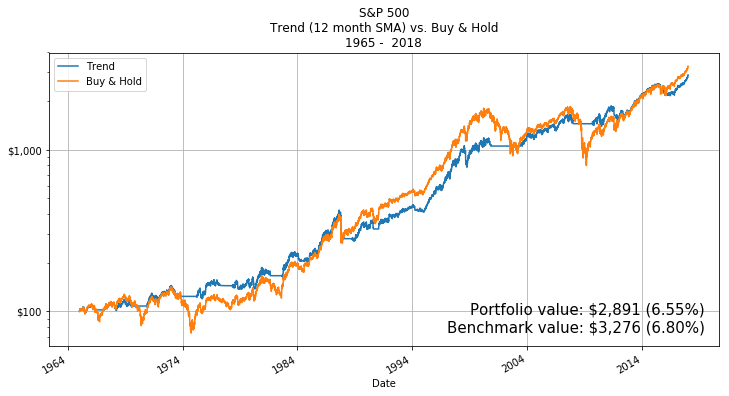

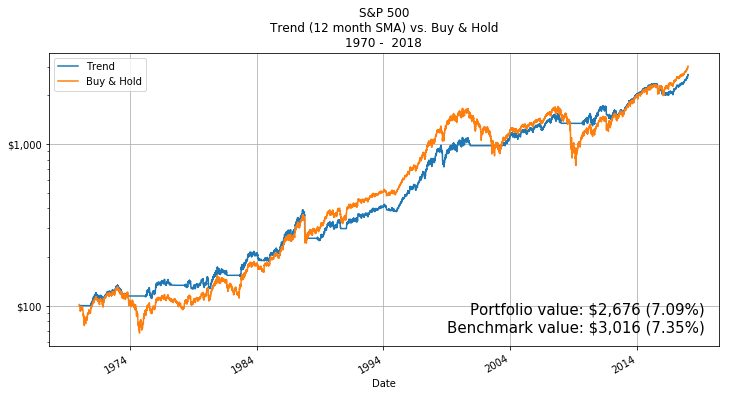

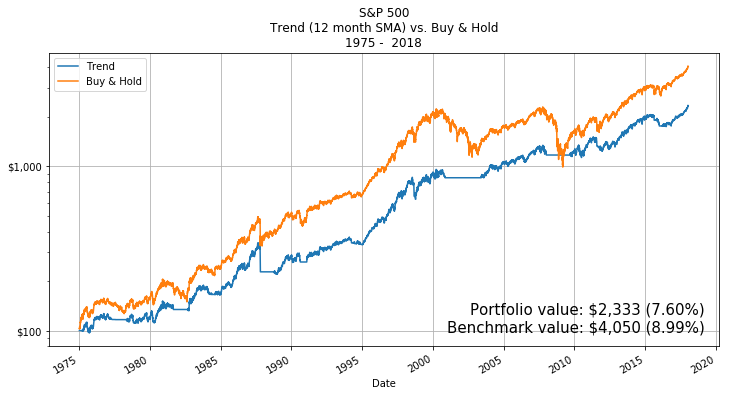

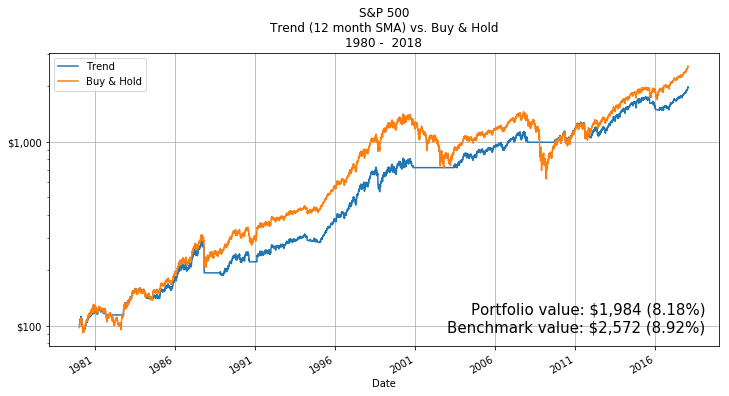

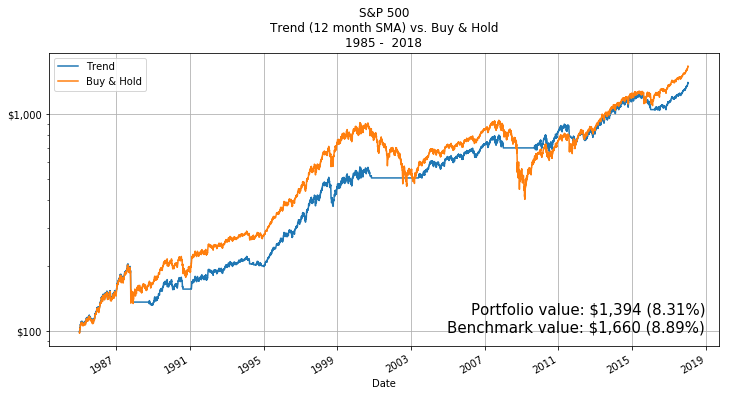

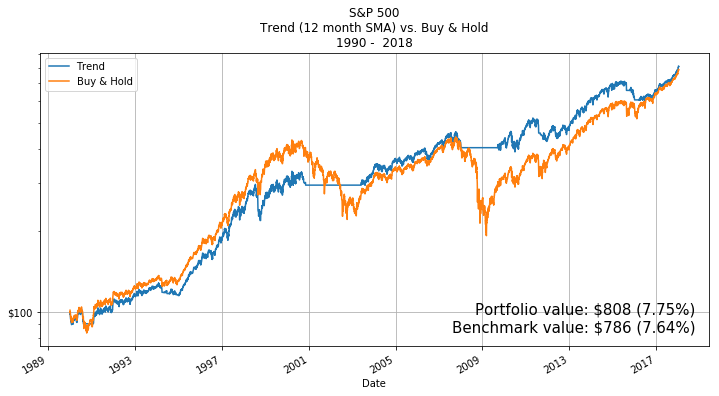

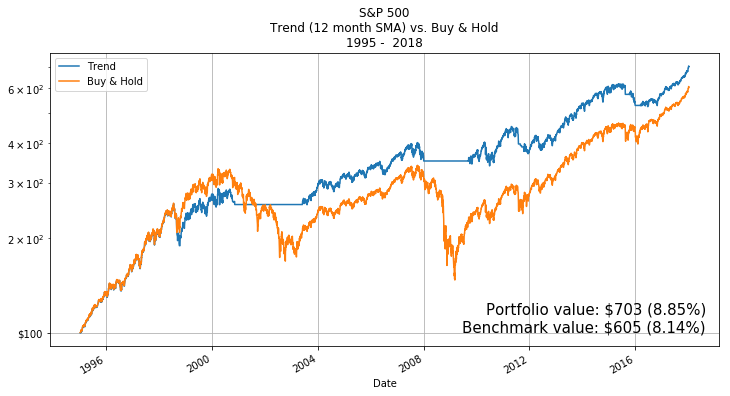

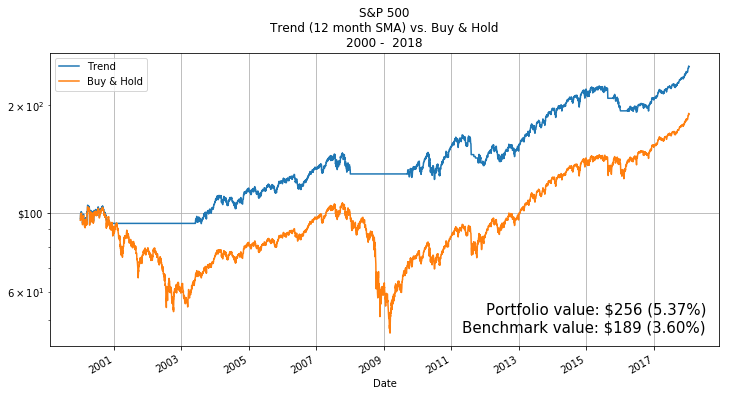

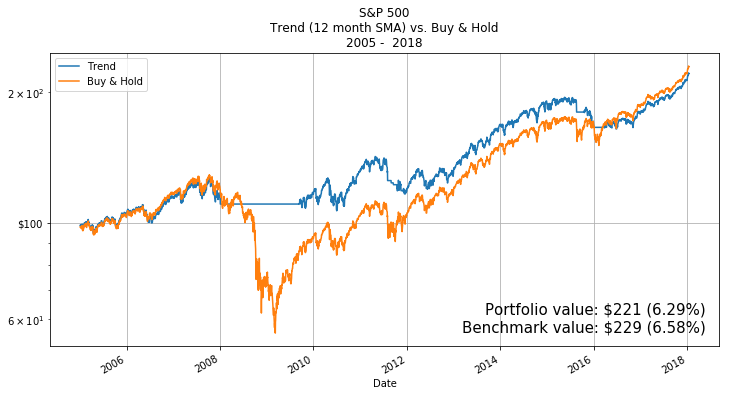

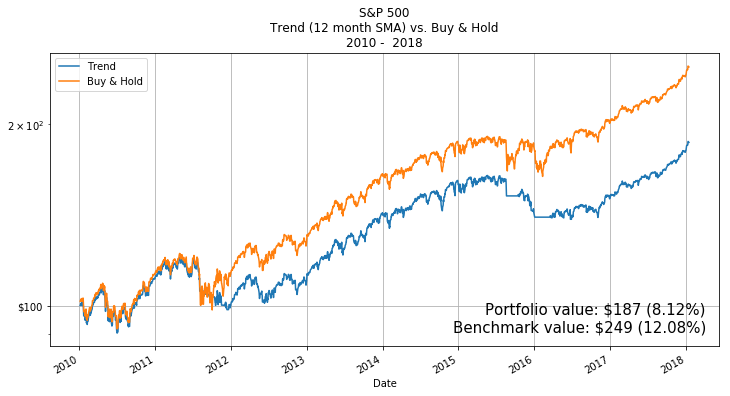

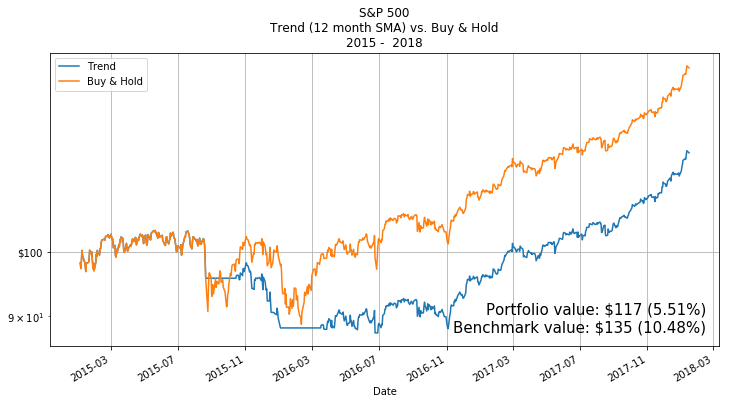

In [20]:
year = 1960
while(year <= 2018):
    backtest(df[datetime(year, 1, 1):])
    year += 5